In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [12]:
def make_linear_reg(all_data_rows):
    reg = LinearRegression() # Creating model
    
    s = loop_linear_reg(all_data_rows,reg)
    
    titles = ['Slope', 'R2', 'intercept'] #Headers for the final table
    s.index = tableS6.iloc[:,2] # Column with gene names
    s.columns = titles
    return s

In [13]:
def loop_linear_reg(all_data_rows,reg):
    for row in range(all_data_rows):
        Y = protein_copies_df.iloc[row,:]    
           
        reg = reg.fit(X, Y) # Fitting trainig data
        
        Y_pred = reg.predict(X) # Y prediction
    
        r2_score = reg.score(X, Y)  # Calculating R2 Score
        
        # Calculated values. Score -> R squared; coef -> slope; intercept -> Y value when X = 0
        results_n = [reg.coef_[0],r2_score,reg.intercept_]
        results_n = pd.DataFrame(results_n)
        results.append(results_n)
        
        s = pd.concat(results,axis=1)
        s = pd.DataFrame(s)
        s = s.transpose()
    return s

In [14]:
def sort_growth_rates(data):
    sorted_growth_rates = []
    for medium in growth_media_names:
        rate = data.loc[medium]['Growth rate (h-1)']
        sorted_growth_rates.append(rate)
    return sorted_growth_rates

In [15]:
# Read the data
tableS6= pd.read_excel("schmidt_data.xlsx",sheet_name="Table S6",skiprows=2) # Table with quantitative proteomic data
tableS23= pd.read_excel("schmidt_data.xlsx",sheet_name="Table S23",skiprows=2) # Table with the growth rate data
tableS6.iloc[:,0].head()

0    P0A8T7
1    P0A8V2
2    P36683
3    P15254
4    P09831
Name: Uniprot Accession, dtype: object

In [16]:
tableS23_1=tableS23.dropna(subset=['Strain']) # Filter for the strain column in table S23
is_BW25113=tableS23_1["Strain"].str.contains("BW25113") # Boolean variable. Filter only the BW25113 strain, where 22 growth conditions were tested

In [17]:
tableS23_2=tableS23_1[is_BW25113] # Final table with data only for the specified strain
tableS23_2.head()

,Growth condition,Strain,Growth rate (h-1),Stdev,Single cell volume [fl]1,Doubling time (h-1),Time exp before harvest (h),# of doublings at exponential growth before harvesting,OD @ harvesting. replicates,Unnamed: 9,Unnamed: 10,Number of Proteins Identified (FDR 1%)2
0,LB,BW25113,1.90,0.030,4.285700,0.4,5,13.7,1.80,1.37,1.34,1752.0
3,Glycerol + AA,BW25113,1.27,0.010,3.825863,0.5,7.5,13.8,0.50,0.51,0.50,1675.0
4,Acetate,BW25113,0.30,0.040,2.295300,2.3,29.3,12.7,0.53,0.22,0.48,1683.0
5,Fumarate,BW25113,0.42,0.020,2.538708,1.7,25.4,15.2,0.22,0.20,0.14,1696.0
6,Galactose,BW25113,0.26,0.003,2.210772,2.7,52.1,19.2,2.02,2.03,2.02,1650.0


In [18]:
P1_copies = tableS6.loc[:,'Glucose':'Fructose'] # Extract protein copies per cell for all media
P1_copies.head()

,Glucose,LB,Glycerol + AA,Acetate,Fumarate,Glucosamine,Glycerol,Pyruvate,Chemostat µ=0.5,Chemostat µ=0.35,...,Stationary phase 1 day,Stationary phase 3 days,Osmotic-stress glucose,42°C glucose,pH6 glucose,Xylose,Mannose,Galactose,Succinate,Fructose
0,2778.519359,7164.365261,4503.008971,2179.987893,2444.360952,3315.670480,2844.543315,2729.853857,4780.473046,3900.470038,...,1734.813718,1907.402304,2247.844772,3985.374673,3339.350980,3631.530693,3401.439200,2258.169809,2764.093478,4516.849523
1,3957.434464,8888.466379,5198.560850,2661.253272,3198.783333,3999.083577,3748.809939,3714.432333,5244.783448,4388.325065,...,2378.505976,2226.871744,3253.953113,4922.674021,4031.662066,4437.013516,4142.901444,2820.449491,3855.147645,5269.436583
2,7595.542046,16599.719405,17548.341931,22843.967449,19491.484058,13752.781384,10792.191853,16395.219689,15733.209919,20261.123449,...,933.302266,756.478368,2814.510432,4841.834921,4648.925392,6697.447166,16516.920057,12875.302404,19547.132064,8782.370172
3,2456.265985,820.685737,2339.023495,1437.660376,2071.498566,1958.940131,2067.728776,2708.097340,2285.246876,1730.342352,...,617.662034,734.877414,1318.125833,1885.490251,1708.222151,1720.754608,1764.284838,1570.497687,1913.471944,2405.721350
4,2858.930632,604.305858,651.951059,1362.610998,1280.730747,1977.280635,2203.878713,1690.779906,2321.416779,1959.482040,...,229.571531,183.118043,833.577432,2979.361330,2723.477662,2496.134667,2078.529818,1398.105174,1552.874030,3858.169347


In [19]:
tableS23_reindexed = tableS23_2.set_index('Growth condition')

In [20]:
growth_media_names = sorted(tableS23_2['Growth condition']) # Order column names alphabetically in a list
protein_copies_df = P1_copies[growth_media_names] # Use above list to order data frame
protein_copies_df = protein_copies_df.fillna(value = 0) # Proteins with very few copies are set to a value of 0 copies per cell
protein_copies_df.head()

,42°C glucose,Acetate,Chemostat µ=0.12,Chemostat µ=0.20,Chemostat µ=0.35,Chemostat µ=0.5,Fructose,Fumarate,Galactose,Glucosamine,...,Glycerol + AA,LB,Mannose,Osmotic-stress glucose,Pyruvate,Stationary phase 1 day,Stationary phase 3 days,Succinate,Xylose,pH6 glucose
0,3985.374673,2179.987893,2999.575266,3476.946247,3900.470038,4780.473046,4516.849523,2444.360952,2258.169809,3315.670480,...,4503.008971,7164.365261,3401.439200,2247.844772,2729.853857,1734.813718,1907.402304,2764.093478,3631.530693,3339.350980
1,4922.674021,2661.253272,3455.099309,3859.598708,4388.325065,5244.783448,5269.436583,3198.783333,2820.449491,3999.083577,...,5198.560850,8888.466379,4142.901444,3253.953113,3714.432333,2378.505976,2226.871744,3855.147645,4437.013516,4031.662066
2,4841.834921,22843.967449,13763.337974,16409.549972,20261.123449,15733.209919,8782.370172,19491.484058,12875.302404,13752.781384,...,17548.341931,16599.719405,16516.920057,2814.510432,16395.219689,933.302266,756.478368,19547.132064,6697.447166,4648.925392
3,1885.490251,1437.660376,1218.805606,1467.936016,1730.342352,2285.246876,2405.721350,2071.498566,1570.497687,1958.940131,...,2339.023495,820.685737,1764.284838,1318.125833,2708.097340,617.662034,734.877414,1913.471944,1720.754608,1708.222151
4,2979.361330,1362.610998,1379.003085,1771.177248,1959.482040,2321.416779,3858.169347,1280.730747,1398.105174,1977.280635,...,651.951059,604.305858,2078.529818,833.577432,1690.779906,229.571531,183.118043,1552.874030,2496.134667,2723.477662


In [21]:
sorted_growth_rates = sort_growth_rates(tableS23_reindexed)

In [22]:
sorted_growth_rates

[0.66,
 0.3,
 0.12,
 0.2,
 0.35,
 0.5,
 0.65,
 0.42,
 0.26,
 0.46,
 0.58,
 0.47,
 1.27,
 1.9,
 0.47,
 0.55,
 0.4,
 -0.01,
 -0.01,
 0.44,
 0.55,
 0.63]

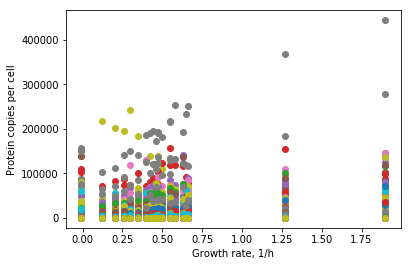

<Figure size 432x288 with 0 Axes>

In [23]:
# Broadly verify the data behaviour in a plot
for protein in range(len(tableS6.iloc[:,0])):
    plt.plot(sorted_growth_rates,protein_copies_df.iloc[protein,:], 'o')
plt.xlabel('Growth rate, 1/h')
plt.ylabel('Protein copies per cell')
fig = plt.figure()

In [24]:
# Linear regression for all proteins in the dataset

all_data_rows = tableS6.shape[0] # Number of rows to be analyzed
results = [] # List which will contain the results
X = sorted_growth_rates
n = len(X) # Total number of values
X = np.asarray(X).reshape(-1,1) # Cannot use Rank 1 matrix in scikit learn

s = make_linear_reg(all_data_rows)
s.head()

,Slope,R2,intercept
Gene,,,
rpoC,2460.101213,0.693288,2065.905195
rpoB,3021.830031,0.800503,2542.255596
acnB,3152.635926,0.037793,10655.330702
purL,182.418330,0.017707,1643.888673
gltB,37.820848,0.000277,1726.017549


In [25]:
# Gene clasification: linear vs non-linear
low_score = s.R2 <= 0.5 # Filter for genes with a R2 lower than or equal to 0.5
print(low_score.head())

high_score = s.R2 > 0.5 # Filter for genes with a R2 lower than or equal to 0.5
print(high_score.head())

non_linear_genes = s[low_score] # Creates a set of genes with non linear behaviour
print(non_linear_genes.head())

linear_genes = s[high_score] # Creates a set of genes with a linear behaviour
print(linear_genes.head())


Gene
rpoC    False
rpoB    False
acnB     True
purL     True
gltB     True
Name: R2, dtype: bool
Gene
rpoC     True
rpoB     True
acnB    False
purL    False
gltB    False
Name: R2, dtype: bool
            Slope        R2     intercept
Gene                                     
acnB  3152.635926  0.037793  10655.330702
purL   182.418330  0.017707   1643.888673
gltB    37.820848  0.000277   1726.017549
aceE  3441.634974  0.203400   4715.253600
adhE    15.089762  0.000003   7078.802399
              Slope        R2     intercept
Gene                                       
rpoC    2460.101213  0.693288   2065.905195
rpoB    3021.830031  0.800503   2542.255596
tufA  199880.373515  0.952688  94293.442921
groL   27085.478239  0.604365  15213.788581
infB    2691.792070  0.883385   1511.182548


In [26]:
# Linear gene sub-clasification: flat vs positive or negative
non_zero_slope = (linear_genes.Slope > 1000) | (linear_genes.Slope < -1000) # Filter for medium-dependent genes
flat_slope = (linear_genes.Slope <= 1000) & (linear_genes.Slope >= -1000) # Filter for medium-independent genes

non_zero_genes = linear_genes[non_zero_slope]
print(non_zero_genes.head())

flat_genes = linear_genes[flat_slope]
print(flat_genes.head())

              Slope        R2     intercept
Gene                                       
rpoC    2460.101213  0.693288   2065.905195
rpoB    3021.830031  0.800503   2542.255596
tufA  199880.373515  0.952688  94293.442921
groL   27085.478239  0.604365  15213.788581
infB    2691.792070  0.883385   1511.182548
           Slope        R2   intercept
Gene                                  
secA  637.434915  0.730926  389.538819
gyrA  686.067909  0.762580  399.307788
pepN  869.436585  0.864076  888.407667
putA  724.035844  0.812918 -141.087597
mukB  162.989441  0.559145  142.302774
